# INITIALIZATION

In [2]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Read data
data = pd.read_csv("dataset.csv")

# Check head
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# PRE-EDA

In [4]:
# Check information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [23]:
# Check null values
missing_values = pd.DataFrame({
        "Columns": data.columns,
        "Missing Values": data.isnull().sum()
}).reset_index(drop=True).sort_values(by="Missing Values", ascending=False)

# Display missing values
missing_values

,Columns,Missing Values
0,Marital status,0
1,Application mode,0
2,Application order,0
3,Course,0
4,Daytime/evening attendance,0
5,Previous qualification,0
6,Nationality,0
7,Mother's qualification,0
8,Father's qualification,0
9,Mother's occupation,0


No null values; clear to continue.

# PREPROCESSING

## Rename Columns

In [6]:
# rename "Nacionality" to "Nationality"
data.rename(columns={"Nacionality": "Nationality"}, inplace=True)

## Convert Numbers to Strings (Better Interpretability)

In [8]:
# Convert marital status to categorical
data['Marital status_cat'] = data['Marital status'].map({
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto union',
    6: 'Legally separated'
})

In [9]:
# Convert nationality to categorical
data['Nationality_cat'] = data['Nationality'].map({
    1: 'Portuguese',
    2: 'German',
    3: 'Spanish',
    4: 'Italian',
    5: 'Dutch',
    6: 'English',
    7: 'Lithuanian',
    8: 'Angolan',
    9: 'Cape Verdean',
    10: 'Guinean',
    11: 'Mozambican',
    12: 'Santomean',
    13: 'Turkish',
    14: 'Brazilian',
    15: 'Romanian',
    16: 'Moldova (Republic of)',
    17: 'Mexican',
    18: 'Ukrainian',
    19: 'Russian',
    20: 'Cuban',
    21: 'Colombian'
})

In [11]:
# Convert application mode to categorical
data['Application mode_cat'] = data['Application mode'].map({
    1: '1—1st phase—general contingent',
    2: '2—Ordinance No. 612/93',
    3: '3—1st phase—special contingent (Azores Island)',
    4: '4—Holders of other higher courses',
    5: '5—Ordinance No. 854-B/99',
    6: '6—International student (bachelor)',
    7: '7—1st phase—special contingent (Madeira Island)',
    8: '8—2nd phase—general contingent',
    9: '9—3rd phase—general contingent',
    10: '10—Ordinance No. 533-A/99, item b2) (Different Plan)',
    11: '11—Ordinance No. 533-A/99, item b3 (Other Institution)',
    12: '12—Over 23 years old',
    13: '13—Transfer',
    14: '14—Change in course',
    15: '15—Technological specialization diploma holders',
    16: '16—Change in institution/course',
    17: '17—Short cycle diploma holders',
    18: '18—Change in institution/course (International)'
})

In [12]:
# Convert course to categorical
data['Course_cat'] = data['Course'].map({
    1: 'Biofuel Production Technologies',
    2: 'Animation and Multimedia Design',
    3: 'Social Service (evening attendance)',
    4: 'Agronomy',
    5: 'Communication Design',
    6: 'Veterinary Nursing',
    7: 'Informatics Engineering',
    8: 'Equiniculture',
    9: 'Management',
    10: 'Social Service',
    11: 'Tourism',
    12: 'Nursing',
    13: 'Oral Hygiene',
    14: 'Advertising and Marketing Management',
    15: 'Journalism and Communication',
    16: 'Basic Education',
    17: 'Management (evening attendance)'
})

In [14]:
# Convert previous qualification to categorical
data['Previous qualification_cat'] = data['Previous qualification'].map({
    1: 'Secondary education',
    2: 'Higher education—bachelor\'s degree',
    3: 'Higher education—degree',
    4: 'Higher education—master\'s degree',
    5: 'Higher education—doctorate',
    6: 'Frequency of higher education',
    7: '12th year of schooling—not completed',
    8: '11th year of schooling—not completed',
    9: 'Other—11th year of schooling',
    10: '10th year of schooling',
    11: '10th year of schooling—not completed',
    12: 'Basic education 3rd cycle (9th/10th/11th year) or equivalent',
    13: 'Basic education 2nd cycle (6th/7th/8th year) or equivalent',
    14: 'Technological specialization course',
    15: 'Higher education—degree (1st cycle)',
    16: 'Professional higher technical course',
    17: 'Higher education—master\'s degree (2nd cycle)'
})

In [17]:
# Convert mother's qualification to categorical
data['Mother qualification_cat'] = data['Mother\'s qualification'].map({
    1: 'Secondary Education—12th Year of Schooling or Equivalent',
    2: 'Higher Education—bachelor\'s degree',
    3: 'Higher Education—degree',
    4: 'Higher Education—master\'s degree',
    5: 'Higher Education—doctorate',
    6: 'Frequency of Higher Education',
    7: '12th Year of Schooling—not completed',
    8: '11th Year of Schooling—not completed',
    9: '7th Year (Old)',
    10: 'Other—11th Year of Schooling',
    11: '2nd year complementary high school course',
    12: '10th Year of Schooling',
    13: 'General commerce course',
    14: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent',
    15: 'Complementary High School Course',
    16: 'Technical-professional course',
    17: 'Complementary High School Course—not concluded',
    18: '7th year of schooling',
    19: '2nd cycle of the general high school course',
    20: '9th Year of Schooling—not completed',
    21: '8th year of schooling',
    22: 'General Course of Administration and Commerce',
    23: 'Supplementary Accounting and Administration',
    24: 'Unknown',
    25: 'Cannot read or write',
    26: 'Can read without having a 4th year of schooling',
    27: 'Basic education 1st cycle (4th/5th year) or equivalent',
    28: 'Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent',
    29: 'Technological specialization course',
    30: 'Higher education—degree (1st cycle)',
    31: 'Specialized higher studies course',
    32: 'Professional higher technical course',
    33: 'Higher Education—master\'s degree (2nd cycle)',
    34: 'Higher Education—doctorate (3rd cycle)'
})

In [18]:
# Convert father's qualification to categorical
data['Father qualification_cat'] = data['Father\'s qualification'].map({
    1: 'Secondary Education—12th Year of Schooling or Equivalent',
    2: 'Higher Education—bachelor\'s degree',
    3: 'Higher Education—degree',
    4: 'Higher Education—master\'s degree',
    5: 'Higher Education—doctorate',
    6: 'Frequency of Higher Education',
    7: '12th Year of Schooling—not completed',
    8: '11th Year of Schooling—not completed',
    9: '7th Year (Old)',
    10: 'Other—11th Year of Schooling',
    11: '2nd year complementary high school course',
    12: '10th Year of Schooling',
    13: 'General commerce course',
    14: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent',
    15: 'Complementary High School Course',
    16: 'Technical-professional course',
    17: 'Complementary High School Course—not concluded',
    18: '7th year of schooling',
    19: '2nd cycle of the general high school course',
    20: '9th Year of Schooling—not completed',
    21: '8th year of schooling',
    22: 'General Course of Administration and Commerce',
    23: 'Supplementary Accounting and Administration',
    24: 'Unknown',
    25: 'Cannot read or write',
    26: 'Can read without having a 4th year of schooling',
    27: 'Basic education 1st cycle (4th/5th year) or equivalent',
    28: 'Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent',
    29: 'Technological specialization course',
    30: 'Higher education—degree (1st cycle)',
    31: 'Specialized higher studies course',
    32: 'Professional higher technical course',
    33: 'Higher Education—master\'s degree (2nd cycle)',
    34: 'Higher Education—doctorate (3rd cycle)'
})

In [19]:
# Convert mother's occupation to categorical
data['Mother_occupation_cat'] = data["Mother's occupation"].map({
    1: 'Student',
    2: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    3: 'Specialists in Intellectual and Scientific Activities',
    4: 'Intermediate Level Technicians and Professions',
    5: 'Administrative staff',
    6: 'Personal Services, Security and Safety Workers, and Sellers',
    7: 'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',
    8: 'Skilled Workers in Industry, Construction, and Craftsmen',
    9: 'Installation and Machine Operators and Assembly Workers',
    10: 'Unskilled Workers',
    11: 'Armed Forces Professions',
    12: 'Other Situation',
    13: '-',
    14: 'Armed Forces Officers',
    15: 'Armed Forces Sergeants',
    16: 'Other Armed Forces personnel',
    17: 'Directors of administrative and commercial services',
    18: 'Hotel, catering, trade, and other services directors',
    19: 'Specialists in the physical sciences, mathematics, engineering, and related techniques',
    20: 'Health professionals',
    21: 'Teachers',
    22: 'Specialists in finance, accounting, administrative organization, and public and commercial relations',
    23: 'Intermediate level science and engineering technicians and professions',
    24: 'Technicians and professionals of intermediate level of health',
    25: 'Intermediate level technicians from legal, social, sports, cultural, and similar services',
    26: 'Information and communication technology technicians',
    27: 'Office workers, secretaries in general, and data processing operators',
    28: 'Data, accounting, statistical, financial services, and registry-related operators',
    29: 'Other administrative support staff',
    30: 'Personal service workers',
    31: 'Sellers',
    32: 'Personal care workers and the like',
    33: 'Protection and security services personnel',
    34: 'Market-oriented farmers and skilled agricultural and animal production workers',
    35: 'Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence',
    36: 'Skilled construction workers and the like, except electricians',
    37: 'Skilled workers in metallurgy, metalworking, and similar',
    38: 'Skilled workers in electricity and electronics',
    39: 'Workers in food processing, woodworking, and clothing and other industries and crafts',
    40: 'Fixed plant and machine operators',
    41: 'Assembly workers',
    42: 'Vehicle drivers and mobile equipment operators',
    43: 'Unskilled workers in agriculture, animal production, and fisheries and forestry',
    44: 'Unskilled workers in extractive industry, construction, manufacturing, and transport',
    45: 'Meal preparation assistants',
    46: 'Street vendors (except food) and street service providers'
})

In [20]:
# Convert father's occupation to categorical
data['Father_occupation_cat'] = data["Father's occupation"].map({
    1: 'Student',
    2: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    3: 'Specialists in Intellectual and Scientific Activities',
    4: 'Intermediate Level Technicians and Professions',
    5: 'Administrative staff',
    6: 'Personal Services, Security and Safety Workers, and Sellers',
    7: 'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',
    8: 'Skilled Workers in Industry, Construction, and Craftsmen',
    9: 'Installation and Machine Operators and Assembly Workers',
    10: 'Unskilled Workers',
    11: 'Armed Forces Professions',
    12: 'Other Situation',
    13: '-',
    14: 'Armed Forces Officers',
    15: 'Armed Forces Sergeants',
    16: 'Other Armed Forces personnel',
    17: 'Directors of administrative and commercial services',
    18: 'Hotel, catering, trade, and other services directors',
    19: 'Specialists in the physical sciences, mathematics, engineering, and related techniques',
    20: 'Health professionals',
    21: 'Teachers',
    22: 'Specialists in finance, accounting, administrative organization, and public and commercial relations',
    23: 'Intermediate level science and engineering technicians and professions',
    24: 'Technicians and professionals of intermediate level of health',
    25: 'Intermediate level technicians from legal, social, sports, cultural, and similar services',
    26: 'Information and communication technology technicians',
    27: 'Office workers, secretaries in general, and data processing operators',
    28: 'Data, accounting, statistical, financial services, and registry-related operators',
    29: 'Other administrative support staff',
    30: 'Personal service workers',
    31: 'Sellers',
    32: 'Personal care workers and the like',
    33: 'Protection and security services personnel',
    34: 'Market-oriented farmers and skilled agricultural and animal production workers',
    35: 'Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence',
    36: 'Skilled construction workers and the like, except electricians',
    37: 'Skilled workers in metallurgy, metalworking, and similar',
    38: 'Skilled workers in electricity and electronics',
    39: 'Workers in food processing, woodworking, and clothing and other industries and crafts',
    40: 'Fixed plant and machine operators',
    41: 'Assembly workers',
    42: 'Vehicle drivers and mobile equipment operators',
    43: 'Unskilled workers in agriculture, animal production, and fisheries and forestry',
    44: 'Unskilled workers in extractive industry, construction, manufacturing, and transport',
    45: 'Meal preparation assistants',
    46: 'Street vendors (except food) and street service providers'
})

In [21]:
# Convert gender to categorical
data['Gender_cat'] = data['Gender'].map({
    1: 'Male',
    0: 'Female'
})

In [24]:
# Convert daytime/evening attendance to categorical
data['Daytime/evening attendance_cat'] = data['Daytime/evening attendance'].map({
    1: 'Daytime',
    0: 'Evening'
})

In [25]:
# Convert 1-0 to Yes-No
data['Displaced_cat'] = data['Displaced'].map({
    1: 'Yes',
    0: 'No'
})
data['Educational_special_needs_cat'] = data['Educational special needs'].map({
    1: 'Yes',
    0: 'No'
})
data['Debtor_cat'] = data['Debtor'].map({
    1: 'Yes',
    0: 'No'
})
data['Tuition_fees_up_to_date_cat'] = data['Tuition fees up to date'].map({
    1: 'Yes',
    0: 'No'
})
data['Scholarship_holder_cat'] = data['Scholarship holder'].map({
    1: 'Yes',
    0: 'No'
})
data['International_cat'] = data['International'].map({
    1: 'Yes',
    0: 'No'
})

## Convert Strings to Category

In [71]:
# Convert target variable to categorical
data['Target_cat'] = data['Target'].map({
    'Graduate': 2,
    'Dropout': 0,
    'Enrolled': 1
})

# EDA

In [57]:
# Determine ideal number of bins using Freedman-Diaconis rule
def freedman_diaconis_rule(data_series):
    q75, q25 = np.percentile(data_series.dropna(), [75 ,25])
    iqr = q75 - q25
    bin_width = 2 * iqr * (len(data_series.dropna()) ** (-1/3))
    num_bins = int((data_series.max() - data_series.min()) / bin_width)
    return max(1, num_bins)  # Ensure at least 1 bin

num_bins_1st_sem = freedman_diaconis_rule(data['Curricular units 1st sem (grade)'])
num_bins_2nd_sem = freedman_diaconis_rule(data['Curricular units 2nd sem (grade)'])

print(f'Ideal number of bins for 1st semester grades: {num_bins_1st_sem}')
print(f'Ideal number of bins for 2nd semester grades: {num_bins_2nd_sem}')

Ideal number of bins for 1st semester grades: 64
Ideal number of bins for 2nd semester grades: 59


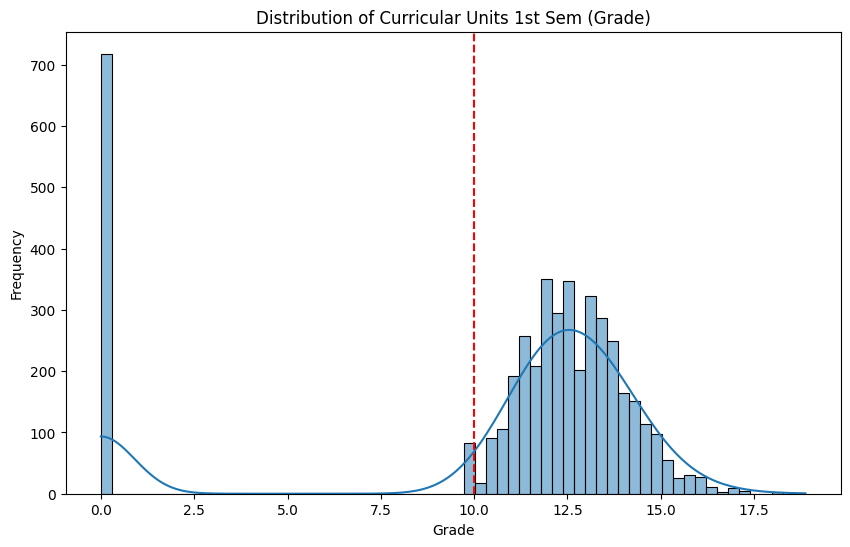

Students with scores below 10 in 1st semester: 719


In [61]:
# Visualize grade distribution for 1st semester
plt.figure(figsize=(10,6))
sns.histplot(data['Curricular units 1st sem (grade)'], bins=num_bins_1st_sem, kde=True)
plt.title('Distribution of Curricular Units 1st Sem (Grade)')
plt.xlabel('Grade')
plt.ylabel('Frequency')
# Add red vertical line at 10
plt.axvline(x=10, color='red', linestyle='--', label='Passing Grade (10)')
plt.show()

print("Students with scores below 10 in 1st semester: " + str(len(data[data['Curricular units 1st sem (grade)'] < 10])))

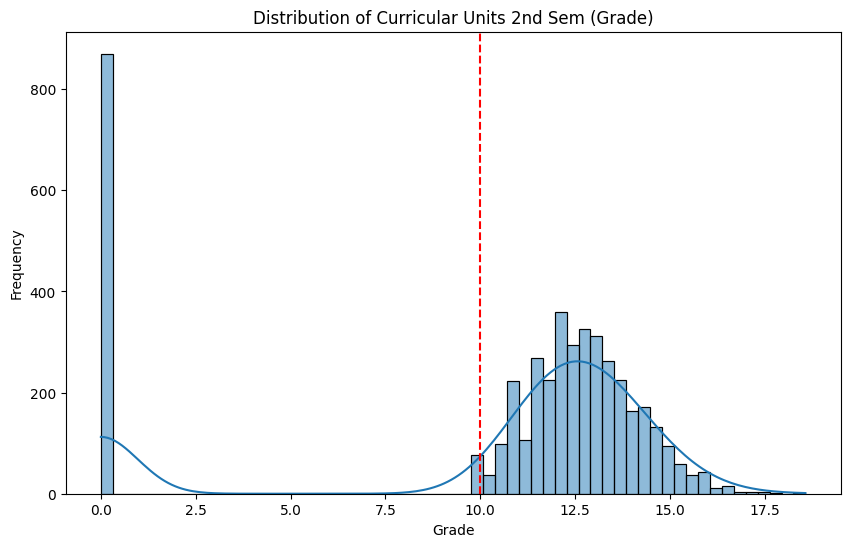

Students with scores below 10 in 2nd semester: 870


In [60]:
# Visualize grade distribution for 2nd semester
plt.figure(figsize=(10,6))
sns.histplot(data['Curricular units 2nd sem (grade)'], bins=num_bins_2nd_sem, kde=True)
plt.title('Distribution of Curricular Units 2nd Sem (Grade)')
plt.xlabel('Grade')
plt.ylabel('Frequency')
# Add red vertical line at 10
plt.axvline(x=10, color='red', linestyle='--', label='Passing Grade (10)')
plt.show()

print("Students with scores below 10 in 2nd semester: " + str(len(data[data['Curricular units 2nd sem (grade)'] < 10])))

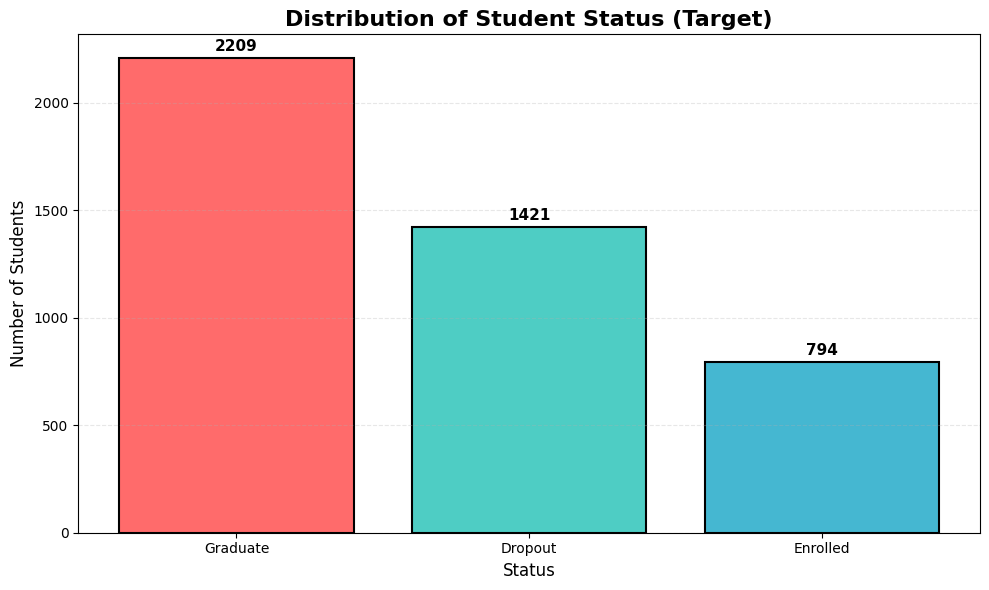

Total students: 4424
Dropout rate: 32.12%
Graduate rate: 49.93%
Enrolled rate: 17.95%


In [ ]:
# Visualize target distribution
plt.figure(figsize=(10,6))
target_counts = data['Target'].value_counts()
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1']
plt.bar(target_counts.index, target_counts.values, color=colors, edgecolor='black', linewidth=1.5)

# Graph informations
plt.title('Distribution of Student Status (Target)', fontsize=16, fontweight='bold')
plt.xlabel('Status', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=0)

# Add value labels on bars
for i, (status, count) in enumerate(target_counts.items()):
    plt.text(i, count + 20, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Display statistics
print(f"Total students: {len(data)}")
print(f"Dropout rate: {(target_counts.get('Dropout', 0) / len(data) * 100):.2f}%")
print(f"Graduate rate: {(target_counts.get('Graduate', 0) / len(data) * 100):.2f}%")
print(f"Enrolled rate: {(target_counts.get('Enrolled', 0) / len(data) * 100):.2f}%")

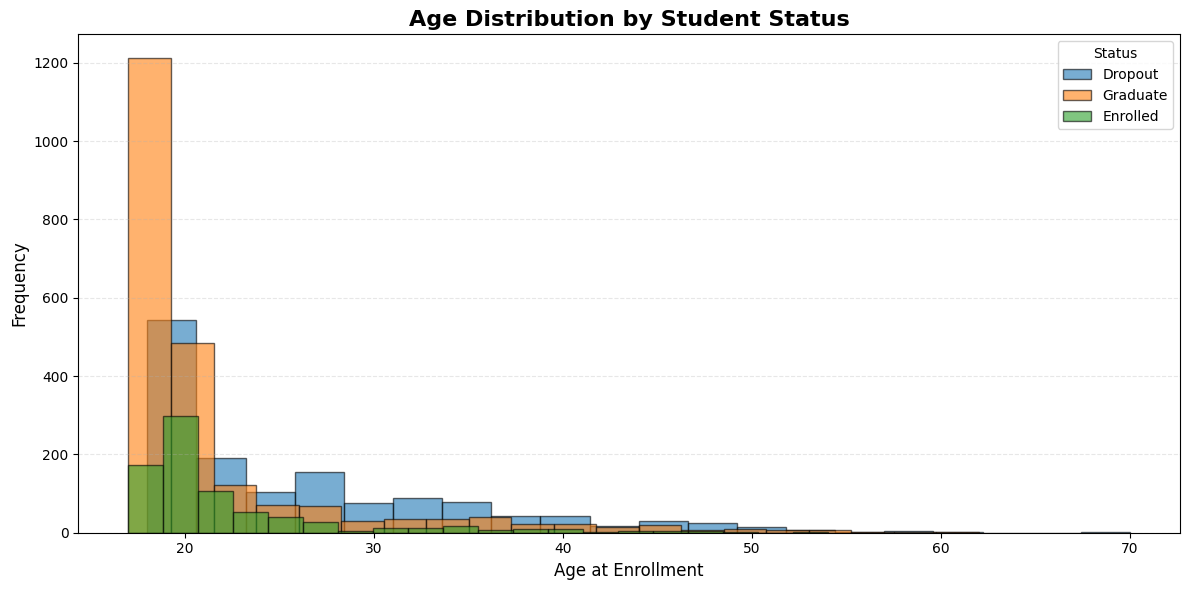

Age Statistics by Target Status:
               mean       std   min   max
Target                                   
Dropout   26.068966  8.704024  18.0  70.0
Enrolled  22.369018  6.302672  17.0  54.0
Graduate  21.783612  6.693218  17.0  62.0


In [ ]:
# Visualize target per age distribution
plt.figure(figsize=(12,6))
for target_status in data['Target'].unique():
    subset = data[data['Target'] == target_status]
    plt.hist(subset['Age at enrollment'], bins=20, alpha=0.6, label=target_status, edgecolor='black')

# Graph informations
plt.title('Age Distribution by Student Status', fontsize=16, fontweight='bold')
plt.xlabel('Age at Enrollment', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Status', fontsize=10)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Summary statistics
print("Age Statistics by Target Status:")
print(data.groupby('Target')['Age at enrollment'].describe()[['mean', 'std', 'min', 'max']])

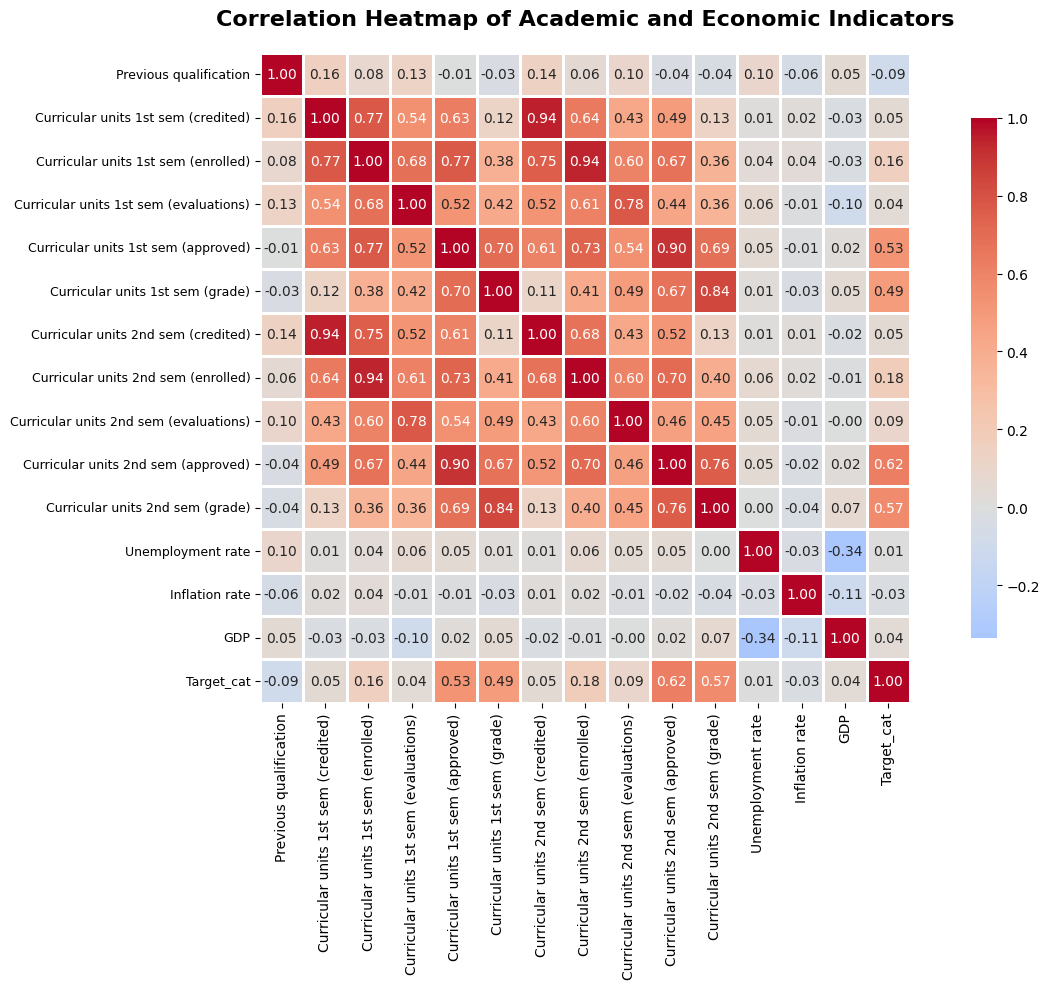

In [ ]:
# Heatmap of features and targets

# Select features
academic_cols = [
    'Previous qualification',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
    'Target_cat'
]

# Calculate correlation matrix
corr_matrix = data[academic_cols].corr()

# Create heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Academic and Economic Indicators', fontsize=16, fontweight='bold', pad=20)
plt.yticks(rotation=0, fontsize=9)

plt.tight_layout()
plt.show()

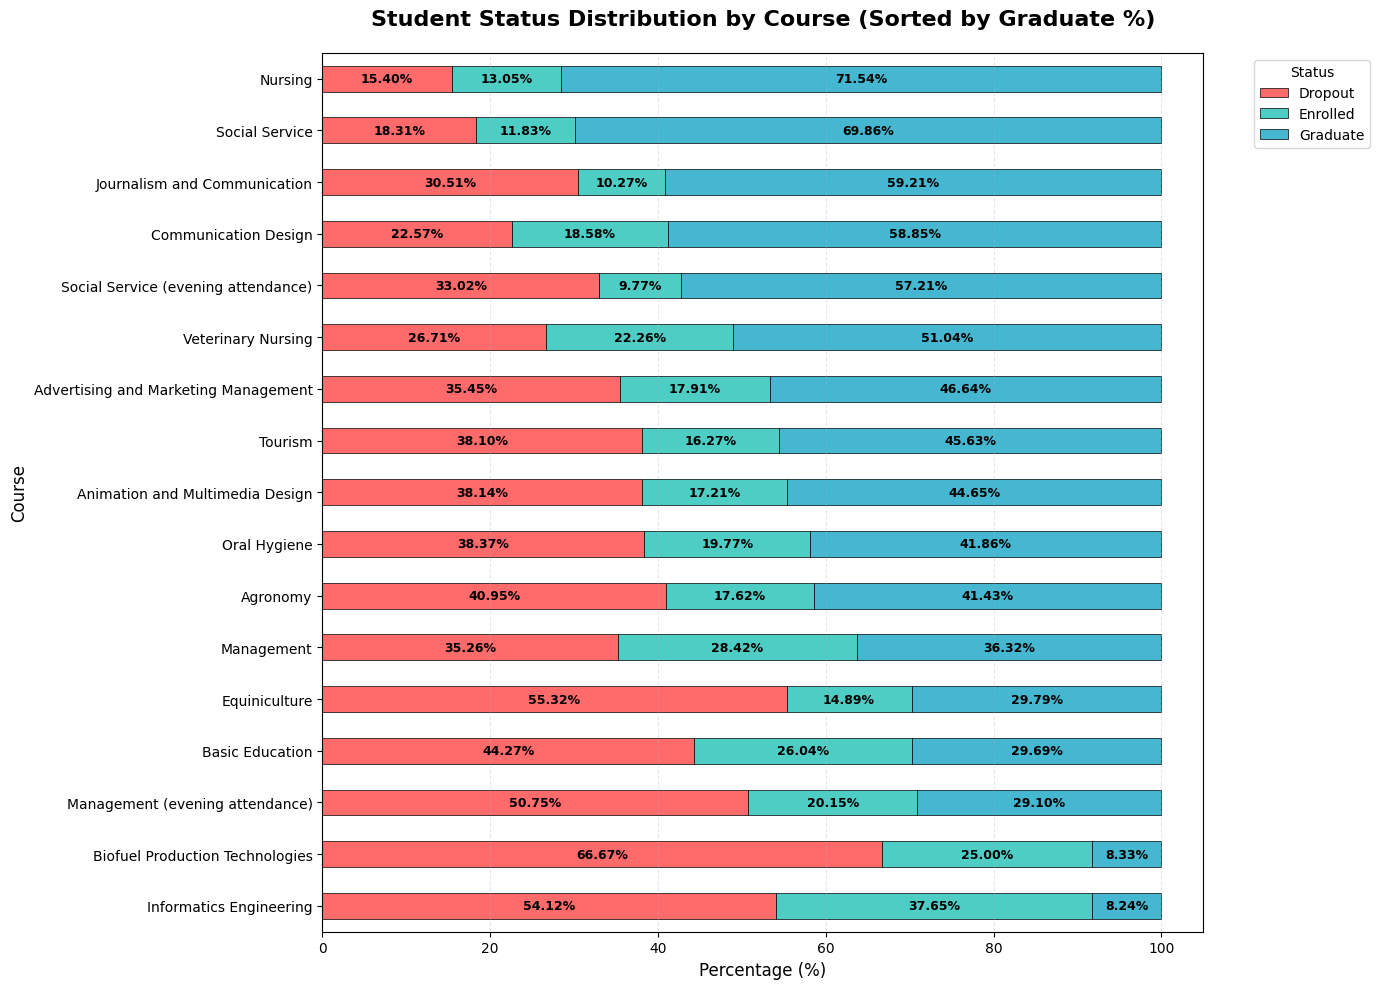


Target Distribution by Course (sorted by Graduate %):
Target                                Dropout  Enrolled  Graduate
Course_cat                                                       
Informatics Engineering                 54.12     37.65      8.24
Biofuel Production Technologies         66.67     25.00      8.33
Management (evening attendance)         50.75     20.15     29.10
Basic Education                         44.27     26.04     29.69
Equiniculture                           55.32     14.89     29.79
Management                              35.26     28.42     36.32
Agronomy                                40.95     17.62     41.43
Oral Hygiene                            38.37     19.77     41.86
Animation and Multimedia Design         38.14     17.21     44.65
Tourism                                 38.10     16.27     45.63
Advertising and Marketing Management    35.45     17.91     46.64
Veterinary Nursing                      26.71     22.26     51.04
Social Service (eveni

In [ ]:
# Target distribution per course
course_target = pd.crosstab(data['Course_cat'], data['Target'], normalize='index') * 100

# Sort by graduate percentage in an ascending manner
course_target_sorted = course_target.sort_values(by='Graduate', ascending=True)

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(14, 10))
course_target_sorted.plot(kind='barh', stacked=True, ax=ax, 
                          color={'Dropout': '#ff6b6b', 'Enrolled': '#4ecdc4', 'Graduate': '#45b7d1'},
                          edgecolor='black', linewidth=0.5)

# Add percentage labels in the middle of each bar segment
for i, course in enumerate(course_target_sorted.index):
    cumulative = 0
    for status in ['Dropout', 'Enrolled', 'Graduate']:
        if status in course_target_sorted.columns:
            value = course_target_sorted.loc[course, status]
            if value > 3:  # Only show label if segment is large enough
                label_position = cumulative + value / 2
                ax.text(label_position, i, f'{value:.2f}%', 
                       ha='center', va='center', fontsize=9, fontweight='bold', color='black')
            cumulative += value

# Graph informations
plt.title('Student Status Distribution by Course (Sorted by Graduate %)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Course', fontsize=12)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Display the actual percentages
print("\nTarget Distribution by Course (sorted by Graduate %):")
print("="*80)
course_target_display = course_target_sorted.round(2)
print(course_target_display.to_string())

# Show the count of students per course (statistics)
print("\n\nStudent Count by Course:")
print("="*80)
course_counts = data['Course_cat'].value_counts().loc[course_target_sorted.index]
print(course_counts.to_string())

In [ ]:
# Visualize target per age distribution (animation)
data['Age_Group'] = pd.cut(data['Age at enrollment'], 
                           bins=[17, 20, 25, 30, 35, 40, 100],
                           labels=['18-20', '21-25', '26-30', '31-35', '36-40', '40+'])

# Prepare data for animation
age_anim_data = []
for age_group in ['18-20', '21-25', '26-30', '31-35', '36-40', '40+']:
    for target in data['Target'].unique():
        subset = data[(data['Age_Group'] == age_group) & (data['Target'] == target)]
        if len(subset) > 0:
            age_anim_data.append({
                'Age_Group': age_group,
                'Target': target,
                'Avg_1st_Sem_Grade': subset['Curricular units 1st sem (grade)'].mean(),
                'Avg_2nd_Sem_Grade': subset['Curricular units 2nd sem (grade)'].mean(),
                'Avg_Approved_1st': subset['Curricular units 1st sem (approved)'].mean(),
                'Avg_Approved_2nd': subset['Curricular units 2nd sem (approved)'].mean(),
                'Count': len(subset),
                'Dropout_Rate': (subset['Target'] == 'Dropout').sum() / len(subset) * 100
            })

df_age_anim = pd.DataFrame(age_anim_data)

# Create animated bubble chart
fig = px.scatter(df_age_anim,
                 x='Avg_Approved_1st',
                 y='Avg_1st_Sem_Grade',
                 animation_frame='Age_Group',
                 color='Target',
                 size='Count',
                 hover_name='Target',
                 hover_data={
                     'Avg_Approved_1st': ':.2f',
                     'Avg_1st_Sem_Grade': ':.2f',
                     'Count': True,
                     'Target': False
                 },
                 title='Academic Performance Evolution Across Age Groups',
                 labels={
                     'Avg_Approved_1st': 'Average Approved Units (1st Sem)',
                     'Avg_1st_Sem_Grade': 'Average Grade (1st Sem)',
                     'Target': 'Status'
                 },
                 color_discrete_map={'Dropout': '#ff6b6b', 'Enrolled': '#4ecdc4', 'Graduate': '#45b7d1'},
                 size_max=60)

# Graph informations
fig.update_layout(
    width=1000,
    height=600,
    font=dict(size=12),
    title_font_size=16,
    xaxis=dict(range=[0, df_age_anim['Avg_Approved_1st'].max() + 1]),
    yaxis=dict(range=[0, df_age_anim['Avg_1st_Sem_Grade'].max() + 2])
)

fig.show()

# Statistics
print("\nSummary: Academic Performance by Age Group")
print("="*80)
print(df_age_anim.pivot_table(
    values=['Avg_1st_Sem_Grade', 'Count'],
    index='Age_Group',
    columns='Target',
    aggfunc='mean'
).round(2))


Summary: Academic Performance by Age Group
          Avg_1st_Sem_Grade                     Count                  
Target              Dropout Enrolled Graduate Dropout Enrolled Graduate
Age_Group                                                              
18-20                  7.87    11.06    12.63   542.0    469.0   1535.0
21-25                  7.39    11.22    12.41   295.0    182.0    351.0
26-30                  6.90    10.80    13.16   229.0     57.0     97.0
31-35                  6.96    11.29    12.97   147.0     37.0     86.0
36-40                  5.72    11.95    12.60    94.0     21.0     52.0
40+                    6.37    11.78    12.90   114.0     26.0     85.0


In [ ]:
# Visualize correlation of mother's qualification towards target

# Get the unique mother qualification categories that exist in the data
mother_qual_categories = sorted(data['Mother qualification_cat'].dropna().unique())

# Define logical ordering for education levels (lowest to highest)
education_order = [
    'Cannot read or write',
    'Can read without having a 4th year of schooling',
    'Basic education 1st cycle (4th/5th year) or equivalent',
    'Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent',
    '7th year of schooling',
    '7th Year (Old)',
    '8th year of schooling',
    '9th Year of Schooling—not completed',
    'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent',
    '10th Year of Schooling',
    '11th Year of Schooling—not completed',
    'Other—11th Year of Schooling',
    '12th Year of Schooling—not completed',
    'Secondary Education—12th Year of Schooling or Equivalent',
    'General commerce course',
    'Technical-professional course',
    'Complementary High School Course',
    'Complementary High School Course—not concluded',
    '2nd year complementary high school course',
    '2nd cycle of the general high school course',
    'General Course of Administration and Commerce',
    'Supplementary Accounting and Administration',
    'Frequency of Higher Education',
    'Technological specialization course',
    'Professional higher technical course',
    'Specialized higher studies course',
    'Higher Education—bachelor\'s degree',
    'Higher education—degree (1st cycle)',
    'Higher Education—degree',
    'Higher Education—master\'s degree (2nd cycle)',
    'Higher Education—master\'s degree',
    'Higher Education—doctorate (3rd cycle)',
    'Higher Education—doctorate',
    'Unknown'
]

# Filter to only categories that exist in our data
mother_qual_order = [cat for cat in education_order if cat in mother_qual_categories]

# Prepare data for animation
mother_anim_data = []
for mother_qual in mother_qual_order:
    for target in data['Target'].unique():
        subset = data[(data['Mother qualification_cat'] == mother_qual) & (data['Target'] == target)]
        if len(subset) > 0:
            mother_anim_data.append({
                'Mother_Qualification': mother_qual,
                'Target': target,
                'Avg_Approved_1st': subset['Curricular units 1st sem (approved)'].mean(),
                'Avg_1st_Sem_Grade': subset['Curricular units 1st sem (grade)'].mean(),
                'Avg_Approved_2nd': subset['Curricular units 2nd sem (approved)'].mean(),
                'Count': len(subset)
            })

df_mother_anim = pd.DataFrame(mother_anim_data)

# Create animated scatter plot
fig2 = px.scatter(df_mother_anim,
                  x='Avg_Approved_1st',
                  y='Avg_1st_Sem_Grade',
                  animation_frame='Mother_Qualification',
                  color='Target',
                  size='Count',
                  hover_name='Target',
                  hover_data={
                      'Avg_Approved_1st': ':.2f',
                      'Avg_1st_Sem_Grade': ':.2f',
                      'Count': True,
                      'Target': False
                  },
                  title='Academic Performance by Mother\'s Education Level',
                  labels={
                      'Avg_Approved_1st': 'Average Approved Units (1st Sem)',
                      'Avg_1st_Sem_Grade': 'Average Grade (1st Sem)',
                      'Target': 'Status'
                  },
                  color_discrete_map={'Dropout': '#ff6b6b', 'Enrolled': '#4ecdc4', 'Graduate': '#45b7d1'},
                  size_max=60)

# Graph informations
fig2.update_layout(
    width=1000,
    height=600,
    font=dict(size=12),
    title_font_size=16,
    xaxis=dict(range=[0, df_mother_anim['Avg_Approved_1st'].max() + 1]),
    yaxis=dict(range=[0, df_mother_anim['Avg_1st_Sem_Grade'].max() + 2]),
    updatemenus=[{
        'buttons': [
            {'args': [None, {'frame': {'duration': 1000, 'redraw': True}, 'fromcurrent': True}], 'label': 'Play', 'method': 'animate'},
            {'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}], 'label': 'Pause', 'method': 'animate'}
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }]
)

fig2.show()

# Statistics
print("\nSummary: Academic Performance by Mother's Education Level")
print("="*80)
print(df_mother_anim.pivot_table(
    values=['Avg_1st_Sem_Grade', 'Count'],
    index='Mother_Qualification',
    columns='Target',
    aggfunc='mean'
).round(2))


Summary: Academic Performance by Mother's Education Level
                                                   Avg_1st_Sem_Grade           \
Target                                                       Dropout Enrolled   
Mother_Qualification                                                            
10th Year of Schooling                                         12.76      NaN   
11th Year of Schooling—not completed                            5.50      NaN   
12th Year of Schooling—not completed                            2.00      NaN   
2nd cycle of the general high school course                     6.29    12.20   
2nd year complementary high school course                       0.00      NaN   
7th Year (Old)                                                 11.08      NaN   
7th year of schooling                                          13.00      NaN   
8th year of schooling                                          11.38      NaN   
9th Year of Schooling—not completed               